## https://github.com/marcogdepinto/emotion-classification-from-audio-files

In [4]:
import os

directory = "ndataset"

for dir_name in os.listdir(directory):
    full_path = os.path.join(directory, dir_name)
    if os.path.isdir(full_path):
        print(dir_name)

Actor_01
Actor_02
Actor_03
Actor_04
Actor_05
Actor_06
Actor_07
Actor_08
Actor_09
Actor_10
Actor_11
Actor_12
Actor_13
Actor_14
Actor_15
Actor_16
Actor_17
Actor_18
Actor_19
Actor_20
Actor_21
Actor_22
Actor_23
Actor_24
audio_speech_actors_01-24


In [5]:
import os

base_dir = "ndataset/audio_speech_actors_01-24"

for actor_dir in os.listdir(base_dir):
    actor_path = os.path.join(base_dir, actor_dir)
    if os.path.isdir(actor_path):
        print(f"Fichiers dans {actor_dir} :")
        for file in os.listdir(actor_path):
            if file.endswith(".wav"):
                print(f"  {file}")

Fichiers dans Actor_01 :
  03-01-01-01-01-01-01.wav
  03-01-01-01-01-02-01.wav
  03-01-01-01-02-01-01.wav
  03-01-01-01-02-02-01.wav
  03-01-02-01-01-01-01.wav
  03-01-02-01-01-02-01.wav
  03-01-02-01-02-01-01.wav
  03-01-02-01-02-02-01.wav
  03-01-02-02-01-01-01.wav
  03-01-02-02-01-02-01.wav
  03-01-02-02-02-01-01.wav
  03-01-02-02-02-02-01.wav
  03-01-03-01-01-01-01.wav
  03-01-03-01-01-02-01.wav
  03-01-03-01-02-01-01.wav
  03-01-03-01-02-02-01.wav
  03-01-03-02-01-01-01.wav
  03-01-03-02-01-02-01.wav
  03-01-03-02-02-01-01.wav
  03-01-03-02-02-02-01.wav
  03-01-04-01-01-01-01.wav
  03-01-04-01-01-02-01.wav
  03-01-04-01-02-01-01.wav
  03-01-04-01-02-02-01.wav
  03-01-04-02-01-01-01.wav
  03-01-04-02-01-02-01.wav
  03-01-04-02-02-01-01.wav
  03-01-04-02-02-02-01.wav
  03-01-05-01-01-01-01.wav
  03-01-05-01-01-02-01.wav
  03-01-05-01-02-01-01.wav
  03-01-05-01-02-02-01.wav
  03-01-05-02-01-01-01.wav
  03-01-05-02-01-02-01.wav
  03-01-05-02-02-01-01.wav
  03-01-05-02-02-02-01.wav
  0

  03-01-01-01-01-01-15.wav
  03-01-01-01-01-02-15.wav
  03-01-01-01-02-01-15.wav
  03-01-01-01-02-02-15.wav
  03-01-02-01-01-01-15.wav
  03-01-02-01-01-02-15.wav
  03-01-02-01-02-01-15.wav
  03-01-02-01-02-02-15.wav
  03-01-02-02-01-01-15.wav
  03-01-02-02-01-02-15.wav
  03-01-02-02-02-01-15.wav
  03-01-02-02-02-02-15.wav
  03-01-03-01-01-01-15.wav
  03-01-03-01-01-02-15.wav
  03-01-03-01-02-01-15.wav
  03-01-03-01-02-02-15.wav
  03-01-03-02-01-01-15.wav
  03-01-03-02-01-02-15.wav
  03-01-03-02-02-01-15.wav
  03-01-03-02-02-02-15.wav
  03-01-04-01-01-01-15.wav
  03-01-04-01-01-02-15.wav
  03-01-04-01-02-01-15.wav
  03-01-04-01-02-02-15.wav
  03-01-04-02-01-01-15.wav
  03-01-04-02-01-02-15.wav
  03-01-04-02-02-01-15.wav
  03-01-04-02-02-02-15.wav
  03-01-05-01-01-01-15.wav
  03-01-05-01-01-02-15.wav
  03-01-05-01-02-01-15.wav
  03-01-05-01-02-02-15.wav
  03-01-05-02-01-01-15.wav
  03-01-05-02-01-02-15.wav
  03-01-05-02-02-01-15.wav
  03-01-05-02-02-02-15.wav
  03-01-06-01-01-01-15.wav
 

In [20]:
import os
import librosa
import numpy as np
import joblib

def extract_and_save_features_joblib_mean_mfcc(directory, save_dir="saved_data"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    X, y = [], []
    for actor_dir in os.listdir(directory):
        path = os.path.join(directory, actor_dir)
        if os.path.isdir(path):
            print(f"Traitement du dossier {actor_dir}")
            files = [f for f in os.listdir(path) if f.endswith(".wav")]
            for file in files:
                try:
                    filepath = os.path.join(path, file)
                    signal, sr = librosa.load(filepath, sr=None)
                    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
                    mfcc_mean = np.mean(mfcc.T, axis=0)  # moyenne des MFCC sur le temps

                    label = int(file[7:8]) - 1  # même extraction que sur le GitHub

                    X.append(mfcc_mean)
                    y.append(label)
                except Exception as e:
                    print(f"Erreur avec {file} : {e}")
                    continue

    X = np.array(X)
    y = np.array(y)

    print("Forme finale X :", X.shape)
    print("Forme finale y :", y.shape)

    joblib.dump(X, os.path.join(save_dir, "X.joblib"))
    joblib.dump(y, os.path.join(save_dir, "y.joblib"))
    print(f"Features et labels sauvegardés dans {save_dir}")

# Usage
base_dir = "ndataset/audio_speech_actors_01-24"
extract_and_save_features_joblib_mean_mfcc(base_dir)


Traitement du dossier Actor_01
Traitement du dossier Actor_02
Traitement du dossier Actor_03
Traitement du dossier Actor_04
Traitement du dossier Actor_05
Traitement du dossier Actor_06
Traitement du dossier Actor_07
Traitement du dossier Actor_08
Traitement du dossier Actor_09
Traitement du dossier Actor_10
Traitement du dossier Actor_11
Traitement du dossier Actor_12
Traitement du dossier Actor_13
Traitement du dossier Actor_14
Traitement du dossier Actor_15
Traitement du dossier Actor_16
Traitement du dossier Actor_17
Traitement du dossier Actor_18
Traitement du dossier Actor_19
Traitement du dossier Actor_20
Traitement du dossier Actor_21
Traitement du dossier Actor_22
Traitement du dossier Actor_23
Traitement du dossier Actor_24
Forme finale X : (1440, 40)
Forme finale y : (1440,)
Features et labels sauvegardés dans saved_data


Shape x_train: (964, 40, 1)
Shape x_test: (476, 40, 1)
Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.1643 - loss: 10.8796 - val_accuracy: 0.1513 - val_loss: 5.1792
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1583 - loss: 7.0881 - val_accuracy: 0.1261 - val_loss: 7.0550
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2310 - loss: 4.9887 - val_accuracy: 0.2857 - val_loss: 3.9433
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2741 - loss: 3.7976 - val_accuracy: 0.2689 - val_loss: 3.8632
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2963 - loss: 2.8526 - val_accuracy: 0.1849 - val_loss: 3.8601
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3799 - loss: 2.2080 - val_accuracy: 0.2962 - val_loss: 2.4608
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3975 - loss: 1.8875 - val_accuracy: 0.2899 - val_loss: 2.4109
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - ac

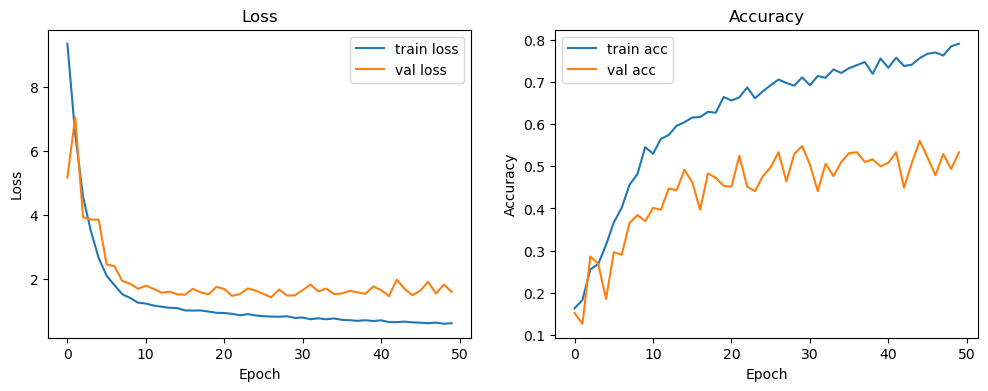

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Accuracy globale sur le test : 0.5336


Classification Report :
              precision    recall  f1-score   support

           0       0.37      0.68      0.47        28
           1       0.74      0.43      0.54        72
           2       0.33      0.47      0.38        58
           3       0.68      0.22      0.33        60
           4       0.69      0.67      0.68        60
           5       0.49      0.80      0.61        55
           6       0.56      0.62      0.59        74
           7       0.67      0.49      0.57        69

    accuracy                           0.53       476
   macro avg       0.57      0.55      0.52       476
weighted avg       0.59      0.53      0.53       476

Matrice de confusion :
[[19  1  2  1  0  0  4  1]
 [13 31  9  0  1  5 10  3]
 [ 2  1 27  1  2 18  1  6]
 [ 9  5 15 13  3 11  3  1]
 [ 2  2  5  0 40  2  7  2]
 [ 0  0  5  2  2 44  2  0]
 [ 3  1  8  1  7  4 46  4]
 [ 4  1 12  1  3  5  9 34]]


In [26]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv1D, Flatten, Dropout, Activation
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class TrainModel:

    @staticmethod
    def train_neural_network(X, y, epochs=50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

        x_traincnn = np.expand_dims(X_train, axis=2)
        x_testcnn = np.expand_dims(X_test, axis=2)

        print("Shape x_train:", x_traincnn.shape)
        print("Shape x_test:", x_testcnn.shape)

        model = Sequential()
        model.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(8))
        model.add(Activation('softmax'))

        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

        history = model.fit(x_traincnn, y_train,
                            batch_size=16,
                            epochs=epochs,
                            validation_data=(x_testcnn, y_test))

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='train acc')
        plt.plot(history.history['val_accuracy'], label='val acc')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

        predictions = np.argmax(model.predict(x_testcnn), axis=1)

        acc = accuracy_score(y_test, predictions)
        print(f"\nAccuracy globale sur le test : {acc:.4f}\n")

        print("\nClassification Report :")
        print(classification_report(y_test, predictions))

        print("Matrice de confusion :")
        print(confusion_matrix(y_test, predictions))


# Chargement des données extraites
X = joblib.load("saved_data/X.joblib")
y = joblib.load("saved_data/y.joblib")

# Entraînement
TrainModel.train_neural_network(X, y, epochs=50)


Training started
Train shape: (964, 40, 1)
Test shape: (476, 40, 1)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_25 (Conv1D)              │ (None, 40, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │        20,488 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,872 (81.53 KB)

 Trainable params: 20,872 (81.53 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
61/61 - 5s - 75ms/step - accuracy: 0.1442 - loss: 9.7798 - val_accuracy: 0.1218 - val_loss: 10.5414
Epoch 2/100
61/61 - 1s - 17ms/step - accuracy: 0.1753 - loss: 6.8431 - val_accuracy: 0.1786 - val_loss: 6.4605
Epoch 3/100
61/61 - 1s - 20ms/step - accuracy: 0.2220 - loss: 4.9025 - val_accuracy: 0.3109 - val_loss: 2.9668
Epoch 4/100
61/61 - 1s - 14ms/step - accuracy: 0.2946 - loss: 3.7472 - val_accuracy: 0.2248 - val_loss: 3.9672
Epoch 5/100
61/61 - 1s - 15ms/step - accuracy: 0.3039 - loss: 2.9039 - val_accuracy: 0.2479 - val_loss: 3.0469
Epoch 6/100
61/61 - 1s - 21ms/step - accuracy: 0.3434 - loss: 2.1936 - val_accuracy: 0.3445 - val_loss: 2.3946
Epoch 7/100
61/61 - 1s - 22ms/step - accuracy: 0.4004 - loss: 1.8116 - val_accuracy: 0.3340 - val_loss: 2.0068
Epoch 8/100
61/61 - 1s - 16ms/step - accuracy: 0.4647 - loss: 1.5245 - val_accuracy: 0.4034 - val_loss: 1.6458
Epoch 9/100
61/61 - 1s - 15ms/step - accuracy: 0.5073 - loss: 1.3769 - val_accuracy: 0.4370 - val_loss: 1.

Epoch 75/100
61/61 - 1s - 18ms/step - accuracy: 0.7967 - loss: 0.5589 - val_accuracy: 0.5672 - val_loss: 1.7076
Epoch 76/100
61/61 - 1s - 16ms/step - accuracy: 0.8143 - loss: 0.5095 - val_accuracy: 0.5525 - val_loss: 1.6035
Epoch 77/100
61/61 - 1s - 21ms/step - accuracy: 0.8174 - loss: 0.5032 - val_accuracy: 0.5756 - val_loss: 1.5759
Epoch 78/100
61/61 - 1s - 14ms/step - accuracy: 0.8268 - loss: 0.4878 - val_accuracy: 0.5588 - val_loss: 1.7623
Epoch 79/100
61/61 - 2s - 28ms/step - accuracy: 0.8112 - loss: 0.5034 - val_accuracy: 0.5609 - val_loss: 1.6675
Epoch 80/100
61/61 - 1s - 18ms/step - accuracy: 0.8237 - loss: 0.4686 - val_accuracy: 0.5399 - val_loss: 1.8516
Epoch 81/100
61/61 - 1s - 16ms/step - accuracy: 0.8454 - loss: 0.4675 - val_accuracy: 0.5420 - val_loss: 1.7342
Epoch 82/100
61/61 - 1s - 17ms/step - accuracy: 0.7988 - loss: 0.5158 - val_accuracy: 0.5399 - val_loss: 1.8983
Epoch 83/100
61/61 - 1s - 21ms/step - accuracy: 0.8257 - loss: 0.4784 - val_accuracy: 0.5546 - val_loss:

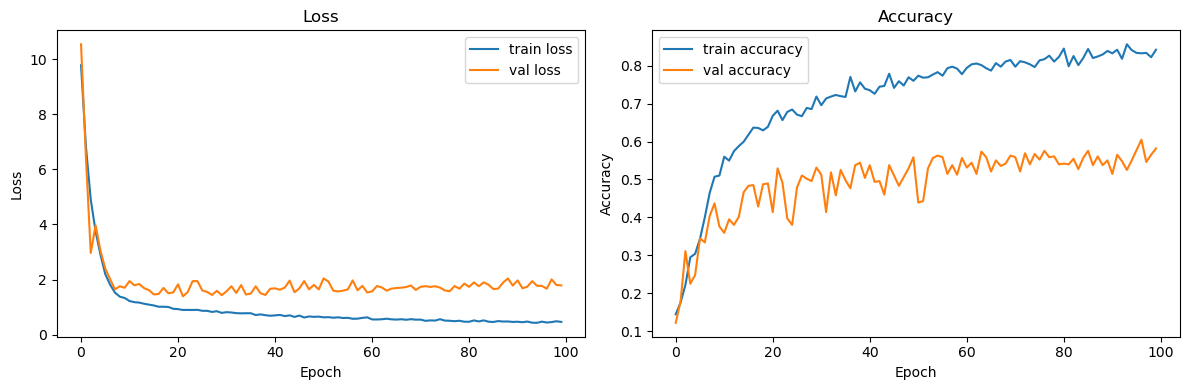

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.32      0.38        28
           1       0.65      0.75      0.70        72
           2       0.49      0.38      0.43        58
           3       0.47      0.53      0.50        60
           4       0.82      0.45      0.58        60
           5       0.59      0.78      0.67        55
           6       0.61      0.59      0.60        74
           7       0.56      0.67      0.61        69

    accuracy                           0.58       476
   macro avg       0.58      0.56      0.56       476
weighted avg       0.59      0.58      0.58       476


Confusion Matrix:
[[ 9  7  0  7  0  0  2  3]
 [ 0 54  2  3  0  2  6  5]
 [ 0  3 22  5  2 13  2 11]
 [ 4  9  2 32  2  6  3  2]
 [ 1  5  6  5 27  3  8  5]
 [ 0  1  3  5  0 43  1  2]
 [ 3  3  4  7  2  3 44  8]
 [ 3  1  6  4  0  3  6 46]]

Accuracy globale sur le test : 0.5819



Model saved at model_save\Emotion_Voice_Detection_Model.h5


In [45]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv1D, Flatten, Dropout, Activation
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.layers import Input

# Dossier de sauvegarde (change si besoin)
MODEL_DIR_PATH = "model_save"

class TrainModel:

    @staticmethod
    def train_neural_network(X, y, epochs=100, batch_size=16):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        x_traincnn = np.expand_dims(X_train, axis=2)
        x_testcnn = np.expand_dims(X_test, axis=2)

        print("Train shape:", x_traincnn.shape)
        print("Test shape:", x_testcnn.shape)

        model = Sequential()
        model.add(Input(shape=(40, 1)))
        model.add(Conv1D(64, 5, padding='same'))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(8, activation='softmax'))

        print(model.summary())

        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

        history = model.fit(x_traincnn, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_testcnn, y_test),
                            verbose=2)

        # Plots loss et accuracy
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='train accuracy')
        plt.plot(history.history['val_accuracy'], label='val accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

        predictions = np.argmax(model.predict(x_testcnn), axis=1)

        print("\nClassification Report:")
        print(classification_report(y_test, predictions))

        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, predictions))
            
        # ... après predictions et classification_report/confusion_matrix

        acc = np.mean(predictions == y_test)
        print(f"\nAccuracy globale sur le test : {acc:.4f}\n")

        
        # Sauvegarde du modèle
        if not os.path.isdir(MODEL_DIR_PATH):
            os.makedirs(MODEL_DIR_PATH)
        model_path = os.path.join(MODEL_DIR_PATH, 'Emotion_Voice_Detection_Model.h5')
        model.save(model_path)
        print(f'Model saved at {model_path}')

if __name__ == '__main__':
    print('Training started')
    X = joblib.load("saved_data/X.joblib")  # adapte le chemin si besoin
    y = joblib.load("saved_data/y.joblib")
    TrainModel.train_neural_network(X, y)


## Test du modèle

In [57]:
import os
import librosa
import numpy as np
from keras.models import load_model

def extract_mfcc_mean(filepath, n_mfcc=40):
    signal, sr = librosa.load(filepath, sr=None)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    return mfcc_mean

class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

model = load_model("model_save/Emotion_Voice_Detection_Model.h5")

audio_dir = "dataset_clean/test/audios"

for audio_file in os.listdir(audio_dir):
    if audio_file.endswith(".wav"):
        audio_path = os.path.join(audio_dir, audio_file)

        feature = extract_mfcc_mean(audio_path)  # shape (40,)
        feature_reshaped = feature.reshape(1, 40, 1)  # shape (1, 40, 1)

        proba = model.predict(feature_reshaped)[0]  # shape (8,)
        pred_idx = np.argmax(proba)
        pred_emotion = class_names[pred_idx]

        print(f"{audio_file} -> Predicted Emotion: {pred_emotion}")
        print("Probabilities:")
        for i, emotion in enumerate(class_names):
            print(f"  {emotion}: {proba[i]:.4f}")
        print()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
dia0_utt0.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
dia0_utt1.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
dia0_utt2.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
dia100_utt0.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
dia100_utt1.wav -> Predicted Emot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
dia102_utt4.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
dia102_utt5.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
dia102_utt6.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
dia102_utt7.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
dia102_utt8.wav -> Predicte

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
dia107_utt6.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
dia107_utt7.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
dia107_utt8.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0045
  sad: 0.0041
  angry: 0.9913
  fearful: 0.0001
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
dia107_utt9.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0056
  happy: 0.0000
  sad: 0.0000
  angry: 0.9944
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
dia108_utt0.wav -> Predicted E

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
dia110_utt7.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
dia110_utt8.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
dia111_utt0.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
dia111_utt1.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0001
  sad: 0.0000
  angry: 0.9999
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
dia111_utt10.wav -> Predicted 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
dia112_utt21.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
dia112_utt3.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
dia112_utt4.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 0.9995
  fearful: 0.0005
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
dia112_utt5.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
dia112_utt6.wav -> Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
dia115_utt0.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
dia115_utt1.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
dia115_utt2.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0001
  sad: 0.0000
  angry: 0.9999
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
dia115_utt3.wav -> Predicted Emotion: angry
Probabilities:
  neutral: 0.0000
  calm: 0.0000
  happy: 0.0000
  sad: 0.0000
  angry: 1.0000
  fearful: 0.0000
  disgust: 0.0000
  surprised: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
dia115_utt4.wav -> Predicted E

KeyboardInterrupt: 

## Nouveau modèle

In [64]:
import joblib
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Chargement des données extraites
X = joblib.load("saved_data/X.joblib")  # shape (samples, 40)
y = joblib.load("saved_data/y.joblib")

# Split train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Modèle dense simple
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


C:\Users\boucceredj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.1370 - loss: 75.2720 - val_accuracy: 0.1261 - val_loss: 5.6464
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1446 - loss: 25.3805 - val_accuracy: 0.1261 - val_loss: 2.0786
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1281 - loss: 9.5950 - val_accuracy: 0.1261 - val_loss: 2.0780
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1585 - loss: 4.0042 - val_accuracy: 0.1261 - val_loss: 2.0769
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1390 - loss: 2.9558 - val_accuracy: 0.1261 - val_loss: 2.0756
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1421 - loss: 2.6942 - val_accuracy: 0.1261 - val_loss: 2.0748
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1319 - loss: 2.3783 - val_accuracy: 0.1261 - val_loss: 2.0737
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1386 - loss: 2.2079 - val_accuracy: 0.1261 -

KeyboardInterrupt: 

## Nouvelle extraction

In [66]:
import os
import numpy as np
import librosa
import joblib
from tensorflow.keras.preprocessing.sequence import pad_sequences

def extract_mfcc_sequences(directory, max_frames=100, n_mfcc=40, save_dir="saved_data"):
    X, y = [], []
    for actor_dir in os.listdir(directory):
        path = os.path.join(directory, actor_dir)
        if os.path.isdir(path):
            print(f"Traitement du dossier {actor_dir}")
            for file in os.listdir(path):
                if file.endswith(".wav"):
                    try:
                        filepath = os.path.join(path, file)
                        signal, sr = librosa.load(filepath, sr=None)
                        mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
                        mfcc = mfcc.T
                        if mfcc.shape[0] > max_frames:
                            mfcc = mfcc[:max_frames, :]
                        X.append(mfcc)
                        label = int(file[7:8]) - 1
                        y.append(label)
                    except Exception as e:
                        print(f"Erreur sur {file} : {e}")

    X_padded = pad_sequences(X, maxlen=max_frames, padding='post', dtype='float32')
    y = np.array(y)

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    joblib.dump(X_padded, os.path.join(save_dir, "X_padded.joblib"))
    joblib.dump(y, os.path.join(save_dir, "y_padded.joblib"))
    print(f"Extraction terminée. Données sauvegardées dans {save_dir}")

# Usage extraction
base_dir = "ndataset/audio_speech_actors_01-24"
extract_mfcc_sequences(base_dir)


Traitement du dossier Actor_01
Traitement du dossier Actor_02
Traitement du dossier Actor_03
Traitement du dossier Actor_04
Traitement du dossier Actor_05
Traitement du dossier Actor_06
Traitement du dossier Actor_07
Traitement du dossier Actor_08
Traitement du dossier Actor_09
Traitement du dossier Actor_10
Traitement du dossier Actor_11
Traitement du dossier Actor_12
Traitement du dossier Actor_13
Traitement du dossier Actor_14
Traitement du dossier Actor_15
Traitement du dossier Actor_16
Traitement du dossier Actor_17
Traitement du dossier Actor_18
Traitement du dossier Actor_19
Traitement du dossier Actor_20
Traitement du dossier Actor_21
Traitement du dossier Actor_22
Traitement du dossier Actor_23
Traitement du dossier Actor_24
Extraction terminée. Données sauvegardées dans saved_data


In [70]:
import joblib
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Charge données extraites (MFCC moyennés)
X = joblib.load("saved_data/X.joblib")  # forme (samples, n_mfcc)
y = joblib.load("saved_data/y.joblib")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Random Forest (souvent efficace sur MFCC moyens)
clf = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

# Prédictions et score
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy RF: {acc:.4f}")


Test Accuracy RF: 0.6155


In [1]:
import joblib
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Charger données
X = joblib.load("saved_data/X.joblib")
y = joblib.load("saved_data/y.joblib")

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

# Modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}

# Résultats globaux
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1 Score": round(f1, 4),
        "Precision": round(precision, 4)
    })

# Affichage du tableau global
df_results = pd.DataFrame(results)
print("\n===== Résumé global des performances =====")
print(df_results.sort_values(by="Accuracy", ascending=False))



Training Logistic Regression...

Training Random Forest...

Training AdaBoost...

Training SVM (RBF Kernel)...


C:\Users\boucceredj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Decision Tree...

Training Gaussian Naive Bayes...

Training K-Nearest Neighbors...

Training MLP Neural Network...

Training XGBoost...


C:\Users\boucceredj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:51:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== Résumé global des performances =====
                  Model  Accuracy  F1 Score  Precision
8               XGBoost    0.6607    0.6546     0.6637
1         Random Forest    0.6016    0.5909     0.5945
0   Logistic Regression    0.4596    0.4579     0.4582
6   K-Nearest Neighbors    0.4517    0.4304     0.4439
7    MLP Neural Network    0.4517    0.4516     0.4790
4         Decision Tree    0.4458    0.4396     0.4457
5  Gaussian Naive Bayes    0.3491    0.3356     0.3614
2              AdaBoost    0.2978    0.2927     0.3304
3      SVM (RBF Kernel)    0.2801    0.2126     0.2287


In [74]:
import joblib
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Charger données
X = joblib.load("saved_data/X.joblib")
y = joblib.load("saved_data/y.joblib")

# Gestion du déséquilibre avec oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

# Liste des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, n_jobs=-1),
    #"Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy {name}: {acc:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, digits=4))



Training Logistic Regression...
Accuracy Logistic Regression: 0.4596
Classification report:
              precision    recall  f1-score   support

           0     0.4928    0.5075    0.5000        67
           1     0.4474    0.4658    0.4564        73
           2     0.4510    0.3770    0.4107        61
           3     0.2787    0.2742    0.2764        62
           4     0.5738    0.6364    0.6034        55
           5     0.4667    0.5283    0.4956        53
           6     0.5397    0.5000    0.5191        68
           7     0.4242    0.4118    0.4179        68

    accuracy                         0.4596       507
   macro avg     0.4593    0.4626    0.4599       507
weighted avg     0.4582    0.4596    0.4579       507


Training Random Forest...
Accuracy Random Forest: 0.6016
Classification report:
              precision    recall  f1-score   support

           0     0.7639    0.8209    0.7914        67
           1     0.6354    0.8356    0.7219        73
           2

C:\Users\boucceredj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\boucceredj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\boucceredj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy Decision Tree: 0.4458
Classification report:
              precision    recall  f1-score   support

           0     0.6292    0.8358    0.7179        67
           1     0.6182    0.4658    0.5312        73
           2     0.3256    0.2295    0.2692        61
           3     0.2923    0.3065    0.2992        62
           4     0.5179    0.5273    0.5225        55
           5     0.3117    0.4528    0.3692        53
           6     0.4068    0.3529    0.3780        68
           7     0.4127    0.3824    0.3969        68

    accuracy                         0.4458       507
   macro avg     0.4393    0.4441    0.4355       507
weighted avg     0.4457    0.4458    0.4396       507


Training Gaussian Naive Bayes...
Accuracy Gaussian Naive Bayes: 0.3491
Classification report:
              precision    recall  f1-score   support

           0     0.2424    0.4776    0.3216        67
           1     0.4778    0.5890    0.5276        73
           2     0.2424    0.1311    

C:\Users\boucceredj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:25:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy XGBoost: 0.6607
Classification report:
              precision    recall  f1-score   support

           0     0.7568    0.8358    0.7943        67
           1     0.6860    0.8082    0.7421        73
           2     0.5745    0.4426    0.5000        61
           3     0.5323    0.5323    0.5323        62
           4     0.6615    0.7818    0.7167        55
           5     0.5915    0.7925    0.6774        53
           6     0.7692    0.5882    0.6667        68
           7     0.7000    0.5147    0.5932        68

    accuracy                         0.6607       507
   macro avg     0.6590    0.6620    0.6528       507
weighted avg     0.6637    0.6607    0.6546       507



In [88]:
import joblib
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Charger les données
X = joblib.load("saved_data/X.joblib")
y = joblib.load("saved_data/y.joblib")

# Oversampling pour équilibrer les classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42
)

# Définir et entraîner le modèle XGBoost
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

print("\nTraining XGBoost...")
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy XGBoost: {acc:.4f}")
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))

#joblib.dump(xgb_model, "model_save/xgb_model.joblib")




Training XGBoost...


C:\Users\boucceredj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:00:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy XGBoost: 0.6607
Classification report:
              precision    recall  f1-score   support

           0     0.7568    0.8358    0.7943        67
           1     0.6860    0.8082    0.7421        73
           2     0.5745    0.4426    0.5000        61
           3     0.5323    0.5323    0.5323        62
           4     0.6615    0.7818    0.7167        55
           5     0.5915    0.7925    0.6774        53
           6     0.7692    0.5882    0.6667        68
           7     0.7000    0.5147    0.5932        68

    accuracy                         0.6607       507
   macro avg     0.6590    0.6620    0.6528       507
weighted avg     0.6637    0.6607    0.6546       507



['model_save/xgb_model.joblib']

In [75]:
import pandas as pd

# Dictionnaire des résultats modèles
results = {
    "XGBoost": 0.6607,
    "Random Forest": 0.6016,
    "Logistic Regression": 0.4596,
    "MLP Neural Network": 0.4517,
    "K-Nearest Neighbors": 0.4517,
    "Decision Tree": 0.4458,
    "Gaussian Naive Bayes": 0.3491,
    "AdaBoost": 0.2978,
    "SVM (RBF Kernel)": 0.2801
}

# Convertir en DataFrame
df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Trier par accuracy décroissante
df_sorted = df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print(df_sorted)


                  Model  Accuracy
0               XGBoost    0.6607
1         Random Forest    0.6016
2   Logistic Regression    0.4596
3    MLP Neural Network    0.4517
4   K-Nearest Neighbors    0.4517
5         Decision Tree    0.4458
6  Gaussian Naive Bayes    0.3491
7              AdaBoost    0.2978
8      SVM (RBF Kernel)    0.2801


In [76]:
# les 2 modèles qui sont intéressants
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
}

In [82]:
import xgboost
print(xgboost.__version__)


3.0.0


In [83]:
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Charger données
X = joblib.load("saved_data/X.joblib")
y = joblib.load("saved_data/y.joblib")

# Oversampling pour équilibrer
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

# Modèle XGBoost avec paramètres améliorés
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_estimators=250,          # plus d'arbres
    max_depth=5,               # un peu plus profond
    learning_rate=0.05,        # learning rate plus bas pour plus de stabilité
    subsample=0.8,             # sous-échantillonnage des données pour réduire l’overfitting
    colsample_bytree=0.8,      # sous-échantillonnage des features
    n_jobs=-1
)

print("Training XGBoost...")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

print("Classification report:")
print(classification_report(y_test, y_pred))


Training XGBoost...


C:\Users\boucceredj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:37:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.6568
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.78        67
           1       0.67      0.77      0.72        73
           2       0.63      0.44      0.52        61
           3       0.45      0.44      0.44        62
           4       0.70      0.76      0.73        55
           5       0.59      0.79      0.68        53
           6       0.71      0.62      0.66        68
           7       0.75      0.60      0.67        68

    accuracy                           0.66       507
   macro avg       0.65      0.66      0.65       507
weighted avg       0.66      0.66      0.65       507



In [84]:
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import uniform, randint

# Charger les données
X = joblib.load("saved_data/X.joblib")
y = joblib.load("saved_data/y.joblib")

# Oversampling pour équilibrer les classes AVANT split
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split train/test sur les données équilibrées
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

# Modèle de base XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Distribution des hyperparamètres à échantillonner
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 7),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# RandomizedSearchCV avec 10 essais
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=10, scoring='accuracy',
    cv=3, verbose=2, random_state=42, n_jobs=-1
)

print("Starting hyperparameter tuning with oversampling...")
random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)

best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy after tuning: {acc:.4f}")

print("Classification report:")
print(classification_report(y_test, y_pred))


Starting hyperparameter tuning with oversampling...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\boucceredj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found: {'colsample_bytree': 0.8123620356542087, 'learning_rate': 0.20014286128198325, 'max_depth': 5, 'n_estimators': 121, 'subsample': 0.8795975452591109}
Test Accuracy after tuning: 0.6430
Classification report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        67
           1       0.68      0.73      0.70        73
           2       0.61      0.44      0.51        61
           3       0.48      0.48      0.48        62
           4       0.66      0.78      0.72        55
           5       0.57      0.75      0.65        53
           6       0.70      0.56      0.62        68
           7       0.67      0.56      0.61        68

    accuracy                           0.64       507
   macro avg       0.64      0.64      0.64       507
weighted avg       0.64      0.64      0.64       507



In [85]:
# 1. Faire oversampling UNIQUEMENT sur train, pas sur test (plus réaliste)
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# 2. RandomizedSearch avec plus d'itérations
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=30,  # plus d'essais
    scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(X_train_res, y_train_res)

print("Best params:", random_search.best_params_)

best_xgb = random_search.best_estimator_

# 3. Tester sur vrai test set déséquilibré
y_pred = best_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy after tuning: {acc:.4f}")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\boucceredj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:43:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'colsample_bytree': 0.8184644554526709, 'learning_rate': 0.06869763494360763, 'max_depth': 5, 'n_estimators': 188, 'subsample': 0.7596527212266415}
Test Accuracy after tuning: 0.6239
              precision    recall  f1-score   support

           0       0.43      0.57      0.49        28
           1       0.72      0.85      0.78        72
           2       0.53      0.47      0.50        58
           3       0.55      0.55      0.55        60
           4       0.65      0.72      0.68        60
           5       0.60      0.69      0.64        55
           6       0.67      0.58      0.62        74
           7       0.72      0.52      0.61        69

    accuracy                           0.62       476
   macro avg       0.61      0.62      0.61       476
weighted avg       0.63      0.62      0.62       476



In [91]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Paramètres à tester
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2.0]
}

# Modèle de base
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Tu peux augmenter ce chiffre pour plus d'exploration
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Lancement de la recherche
random_search.fit(X_train, y_train)

# Meilleurs paramètres et score
print("Best parameters found:")
print(random_search.best_params_)

print(f"\nBest accuracy: {random_search.best_score_:.4f}")

# Réutilisation du meilleur modèle pour prédire
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:
{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}

Best accuracy: 0.5977
Test Accuracy: 0.6351
              precision    recall  f1-score   support

     neutral     0.7143    0.8209    0.7639        67
        calm     0.6667    0.7671    0.7134        73
       happy     0.6585    0.4426    0.5294        61
         sad     0.4762    0.4839    0.4800        62
       angry     0.6667    0.7636    0.7119        55
     fearful     0.5588    0.7170    0.6281        53
     disgust     0.6610    0.5735    0.6142        68
   surprised     0.6731    0.5147    0.5833        68

    accuracy                         0.6351       507
   macro avg     0.6344    0.6354    0.6280       507
weighted avg     0.6375    0.6351    0.6296       507



## test du xgboost = 0.066 acc

In [90]:
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import joblib

# Liste des émotions correspondant aux labels
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# Split train/test déjà effectué...
# Entraînement du modèle
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

print("\nTraining XGBoost...")
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy XGBoost: {acc:.4f}")
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))



Training XGBoost...


C:\Users\boucceredj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:05:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy XGBoost: 0.6607
Classification report:
              precision    recall  f1-score   support

     neutral     0.7568    0.8358    0.7943        67
        calm     0.6860    0.8082    0.7421        73
       happy     0.5745    0.4426    0.5000        61
         sad     0.5323    0.5323    0.5323        62
       angry     0.6615    0.7818    0.7167        55
     fearful     0.5915    0.7925    0.6774        53
     disgust     0.7692    0.5882    0.6667        68
   surprised     0.7000    0.5147    0.5932        68

    accuracy                         0.6607       507
   macro avg     0.6590    0.6620    0.6528       507
weighted avg     0.6637    0.6607    0.6546       507



In [95]:
import os
import librosa
import numpy as np
import pandas as pd
import joblib

# Charger le modèle XGBoost
xgb_model = joblib.load("model_save/xgb_model.joblib")

# Labels du modèle
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# Chargement du CSV avec les vraies émotions
df = pd.read_csv("dataset_clean/test/test_sent_emo.csv", sep=";", encoding="cp1252")
df_subset = df[['Emotion', 'Dialogue_ID', 'Utterance_ID']]

# Mapping des émotions CSV vers labels du modèle
emotion_mapping = {
    "joy": "happy",
    "anger": "angry",
    "surprise": "surprised",
    "sadness": "sad",
    "fear": "fearful",
    "neutral": "neutral",
    "disgust": "disgust",
    "calm": "calm"
}
df_subset['Emotion'] = df_subset['Emotion'].map(emotion_mapping)

# Fonction d'extraction des MFCC (moyenne)
def extract_mfcc_mean(filepath, n_mfcc=40):
    signal, sr = librosa.load(filepath, sr=None)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    return mfcc_mean

# Répertoire audio
audio_dir = "dataset_clean/test/audios"

correct = 0
total = 0

for audio_file in os.listdir(audio_dir):
    if audio_file.endswith(".wav"):
        audio_path = os.path.join(audio_dir, audio_file)
        feature = extract_mfcc_mean(audio_path).reshape(1, -1)
        pred_idx = xgb_model.predict(feature)[0]
        pred_emotion = class_names[pred_idx]

        # Extraire dialogue et utterance id du nom de fichier
        base_name = os.path.splitext(audio_file)[0]  # ex: dia0_utt0
        dialogue_id_str, utterance_id_str = base_name.split('_')
        dialogue_id = int(dialogue_id_str.replace('dia', ''))
        utterance_id = int(utterance_id_str.replace('utt', ''))

        # Trouver la vraie émotion correspondante dans le dataframe
        true_emotion_row = df_subset[(df_subset['Dialogue_ID'] == dialogue_id) & (df_subset['Utterance_ID'] == utterance_id)]
        
        if not true_emotion_row.empty:
            true_emotion = true_emotion_row['Emotion'].values[0]
        else:
            true_emotion = "Unknown"

        print(f"{audio_file} -> Predicted: {pred_emotion} | True: {true_emotion}")

        if true_emotion != "Unknown":
            total += 1
            if pred_emotion == true_emotion:
                correct += 1

accuracy = correct / total if total > 0 else 0
print(f"\nOverall Accuracy: {accuracy:.4f}")


C:\Users\boucceredj\AppData\Local\Temp\ipykernel_10408\484745914.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Emotion'] = df_subset['Emotion'].map(emotion_mapping)


dia0_utt0.wav -> Predicted: happy | True: surprised
dia0_utt1.wav -> Predicted: angry | True: angry
dia0_utt2.wav -> Predicted: angry | True: neutral
dia100_utt0.wav -> Predicted: fearful | True: neutral
dia100_utt1.wav -> Predicted: happy | True: neutral
dia100_utt10.wav -> Predicted: angry | True: sad
dia100_utt11.wav -> Predicted: angry | True: neutral
dia100_utt12.wav -> Predicted: angry | True: neutral
dia100_utt13.wav -> Predicted: angry | True: neutral
dia100_utt14.wav -> Predicted: angry | True: fearful
dia100_utt15.wav -> Predicted: happy | True: fearful
dia100_utt16.wav -> Predicted: angry | True: neutral
dia100_utt17.wav -> Predicted: angry | True: neutral
dia100_utt18.wav -> Predicted: angry | True: fearful
dia100_utt19.wav -> Predicted: happy | True: sad
dia100_utt2.wav -> Predicted: happy | True: neutral
dia100_utt3.wav -> Predicted: happy | True: neutral
dia100_utt4.wav -> Predicted: angry | True: neutral
dia100_utt5.wav -> Predicted: angry | True: sad
dia100_utt6.wav ->

dia115_utt4.wav -> Predicted: angry | True: neutral
dia115_utt5.wav -> Predicted: angry | True: neutral
dia116_utt0.wav -> Predicted: happy | True: neutral
dia116_utt1.wav -> Predicted: angry | True: neutral
dia116_utt10.wav -> Predicted: angry | True: neutral
dia116_utt11.wav -> Predicted: calm | True: angry
dia116_utt2.wav -> Predicted: angry | True: angry
dia116_utt3.wav -> Predicted: fearful | True: neutral
dia116_utt4.wav -> Predicted: angry | True: angry
dia116_utt5.wav -> Predicted: sad | True: sad
dia116_utt6.wav -> Predicted: angry | True: neutral
dia116_utt7.wav -> Predicted: angry | True: neutral
dia116_utt8.wav -> Predicted: angry | True: neutral
dia116_utt9.wav -> Predicted: fearful | True: neutral
dia117_utt0.wav -> Predicted: fearful | True: neutral
dia117_utt1.wav -> Predicted: fearful | True: happy
dia117_utt2.wav -> Predicted: fearful | True: neutral
dia117_utt3.wav -> Predicted: angry | True: neutral
dia117_utt4.wav -> Predicted: angry | True: neutral
dia117_utt5.wav

dia128_utt6.wav -> Predicted: angry | True: disgust
dia128_utt7.wav -> Predicted: angry | True: neutral
dia128_utt8.wav -> Predicted: angry | True: disgust
dia128_utt9.wav -> Predicted: angry | True: neutral
dia129_utt0.wav -> Predicted: happy | True: happy
dia129_utt1.wav -> Predicted: angry | True: surprised
dia129_utt2.wav -> Predicted: angry | True: neutral
dia129_utt3.wav -> Predicted: angry | True: sad
dia129_utt4.wav -> Predicted: angry | True: neutral
dia129_utt5.wav -> Predicted: happy | True: neutral
dia129_utt6.wav -> Predicted: angry | True: neutral
dia129_utt7.wav -> Predicted: angry | True: neutral
dia12_utt0.wav -> Predicted: angry | True: angry
dia12_utt1.wav -> Predicted: angry | True: neutral
dia12_utt10.wav -> Predicted: calm | True: neutral
dia12_utt11.wav -> Predicted: happy | True: happy
dia12_utt12.wav -> Predicted: happy | True: happy
dia12_utt13.wav -> Predicted: angry | True: neutral
dia12_utt14.wav -> Predicted: angry | True: neutral
dia12_utt15.wav -> Predic

dia140_utt9.wav -> Predicted: angry | True: happy
dia141_utt0.wav -> Predicted: angry | True: neutral
dia141_utt1.wav -> Predicted: angry | True: neutral
dia141_utt2.wav -> Predicted: angry | True: neutral
dia141_utt3.wav -> Predicted: angry | True: neutral
dia141_utt4.wav -> Predicted: angry | True: neutral
dia142_utt0.wav -> Predicted: happy | True: neutral
dia142_utt1.wav -> Predicted: happy | True: neutral
dia143_utt0.wav -> Predicted: angry | True: neutral
dia143_utt1.wav -> Predicted: angry | True: neutral
dia143_utt2.wav -> Predicted: happy | True: neutral
dia143_utt3.wav -> Predicted: angry | True: sad
dia143_utt4.wav -> Predicted: calm | True: neutral
dia143_utt5.wav -> Predicted: angry | True: fearful
dia143_utt6.wav -> Predicted: happy | True: surprised
dia143_utt7.wav -> Predicted: angry | True: angry
dia143_utt8.wav -> Predicted: angry | True: disgust
dia144_utt0.wav -> Predicted: angry | True: angry
dia144_utt1.wav -> Predicted: angry | True: happy
dia144_utt10.wav -> Pre

dia158_utt4.wav -> Predicted: angry | True: angry
dia158_utt5.wav -> Predicted: angry | True: neutral
dia158_utt6.wav -> Predicted: angry | True: surprised
dia159_utt0.wav -> Predicted: fearful | True: angry
dia159_utt1.wav -> Predicted: angry | True: angry
dia15_utt0.wav -> Predicted: happy | True: happy
dia15_utt1.wav -> Predicted: fearful | True: happy
dia15_utt2.wav -> Predicted: angry | True: happy
dia15_utt3.wav -> Predicted: angry | True: neutral
dia15_utt4.wav -> Predicted: angry | True: neutral
dia15_utt5.wav -> Predicted: happy | True: angry
dia160_utt0.wav -> Predicted: happy | True: sad
dia160_utt1.wav -> Predicted: happy | True: angry
dia160_utt10.wav -> Predicted: fearful | True: sad
dia160_utt11.wav -> Predicted: calm | True: sad
dia160_utt12.wav -> Predicted: fearful | True: sad
dia160_utt13.wav -> Predicted: angry | True: angry
dia160_utt2.wav -> Predicted: angry | True: angry
dia160_utt3.wav -> Predicted: fearful | True: angry
dia160_utt4.wav -> Predicted: neutral | T

dia171_utt4.wav -> Predicted: angry | True: happy
dia171_utt5.wav -> Predicted: happy | True: neutral
dia171_utt6.wav -> Predicted: calm | True: neutral
dia171_utt7.wav -> Predicted: angry | True: happy
dia171_utt8.wav -> Predicted: fearful | True: happy
dia172_utt0.wav -> Predicted: happy | True: neutral
dia172_utt1.wav -> Predicted: fearful | True: neutral
dia172_utt2.wav -> Predicted: angry | True: neutral
dia173_utt0.wav -> Predicted: angry | True: neutral
dia173_utt1.wav -> Predicted: fearful | True: surprised
dia173_utt10.wav -> Predicted: angry | True: neutral
dia173_utt11.wav -> Predicted: angry | True: sad
dia173_utt12.wav -> Predicted: fearful | True: sad
dia173_utt13.wav -> Predicted: fearful | True: sad
dia173_utt14.wav -> Predicted: fearful | True: sad
dia173_utt15.wav -> Predicted: fearful | True: happy
dia173_utt16.wav -> Predicted: fearful | True: sad
dia173_utt17.wav -> Predicted: angry | True: neutral
dia173_utt18.wav -> Predicted: angry | True: neutral
dia173_utt2.wa

dia184_utt12.wav -> Predicted: angry | True: neutral
dia184_utt13.wav -> Predicted: angry | True: neutral
dia184_utt14.wav -> Predicted: angry | True: happy
dia184_utt2.wav -> Predicted: angry | True: angry
dia184_utt3.wav -> Predicted: angry | True: sad
dia184_utt4.wav -> Predicted: angry | True: angry
dia184_utt5.wav -> Predicted: happy | True: neutral
dia184_utt6.wav -> Predicted: angry | True: fearful
dia184_utt7.wav -> Predicted: angry | True: sad
dia184_utt8.wav -> Predicted: happy | True: neutral
dia184_utt9.wav -> Predicted: happy | True: surprised
dia185_utt0.wav -> Predicted: angry | True: neutral
dia185_utt1.wav -> Predicted: angry | True: neutral
dia185_utt2.wav -> Predicted: angry | True: surprised
dia185_utt3.wav -> Predicted: angry | True: happy
dia185_utt4.wav -> Predicted: angry | True: surprised
dia185_utt5.wav -> Predicted: happy | True: neutral
dia185_utt6.wav -> Predicted: angry | True: happy
dia185_utt7.wav -> Predicted: fearful | True: neutral
dia186_utt0.wav -> 

dia1_utt4.wav -> Predicted: angry | True: happy
dia1_utt5.wav -> Predicted: angry | True: happy
dia1_utt6.wav -> Predicted: angry | True: happy
dia1_utt7.wav -> Predicted: angry | True: happy
dia200_utt0.wav -> Predicted: angry | True: surprised
dia200_utt1.wav -> Predicted: angry | True: angry
dia200_utt2.wav -> Predicted: happy | True: angry
dia200_utt3.wav -> Predicted: angry | True: angry
dia200_utt4.wav -> Predicted: angry | True: angry
dia201_utt0.wav -> Predicted: angry | True: neutral
dia201_utt1.wav -> Predicted: angry | True: surprised
dia201_utt10.wav -> Predicted: angry | True: surprised
dia201_utt11.wav -> Predicted: angry | True: angry
dia201_utt2.wav -> Predicted: fearful | True: happy
dia201_utt3.wav -> Predicted: angry | True: neutral
dia201_utt4.wav -> Predicted: angry | True: neutral
dia201_utt5.wav -> Predicted: angry | True: neutral
dia201_utt6.wav -> Predicted: angry | True: neutral
dia201_utt7.wav -> Predicted: fearful | True: neutral
dia201_utt8.wav -> Predicted

dia217_utt7.wav -> Predicted: happy | True: neutral
dia217_utt8.wav -> Predicted: surprised | True: happy
dia217_utt9.wav -> Predicted: fearful | True: neutral
dia218_utt0.wav -> Predicted: fearful | True: neutral
dia218_utt1.wav -> Predicted: happy | True: neutral
dia218_utt2.wav -> Predicted: fearful | True: neutral
dia219_utt0.wav -> Predicted: angry | True: neutral
dia219_utt1.wav -> Predicted: angry | True: sad
dia21_utt0.wav -> Predicted: fearful | True: neutral
dia21_utt1.wav -> Predicted: angry | True: neutral
dia21_utt2.wav -> Predicted: angry | True: neutral
dia21_utt3.wav -> Predicted: angry | True: neutral
dia21_utt4.wav -> Predicted: angry | True: sad
dia21_utt5.wav -> Predicted: angry | True: happy
dia21_utt6.wav -> Predicted: angry | True: surprised
dia220_utt0.wav -> Predicted: angry | True: disgust
dia220_utt1.wav -> Predicted: angry | True: angry
dia221_utt0.wav -> Predicted: happy | True: neutral
dia221_utt1.wav -> Predicted: happy | True: neutral
dia221_utt2.wav -> 

dia233_utt7.wav -> Predicted: angry | True: happy
dia233_utt8.wav -> Predicted: fearful | True: neutral
dia233_utt9.wav -> Predicted: sad | True: happy
dia234_utt0.wav -> Predicted: angry | True: neutral
dia234_utt1.wav -> Predicted: angry | True: surprised
dia234_utt10.wav -> Predicted: disgust | True: neutral
dia234_utt11.wav -> Predicted: angry | True: surprised
dia234_utt12.wav -> Predicted: angry | True: happy
dia234_utt13.wav -> Predicted: happy | True: neutral
dia234_utt14.wav -> Predicted: happy | True: happy
dia234_utt2.wav -> Predicted: angry | True: neutral
dia234_utt3.wav -> Predicted: angry | True: surprised
dia234_utt4.wav -> Predicted: angry | True: angry
dia234_utt5.wav -> Predicted: angry | True: angry
dia234_utt6.wav -> Predicted: fearful | True: angry
dia234_utt7.wav -> Predicted: angry | True: angry
dia234_utt8.wav -> Predicted: angry | True: neutral
dia234_utt9.wav -> Predicted: disgust | True: neutral
dia235_utt0.wav -> Predicted: calm | True: neutral
dia236_utt0.

dia250_utt2.wav -> Predicted: angry | True: sad
dia250_utt3.wav -> Predicted: angry | True: neutral
dia250_utt4.wav -> Predicted: happy | True: neutral
dia250_utt5.wav -> Predicted: angry | True: surprised
dia250_utt6.wav -> Predicted: angry | True: neutral
dia250_utt7.wav -> Predicted: angry | True: neutral
dia250_utt8.wav -> Predicted: angry | True: neutral
dia251_utt0.wav -> Predicted: angry | True: surprised
dia251_utt1.wav -> Predicted: happy | True: neutral
dia251_utt2.wav -> Predicted: angry | True: neutral
dia251_utt3.wav -> Predicted: sad | True: surprised
dia251_utt4.wav -> Predicted: happy | True: neutral
dia252_utt0.wav -> Predicted: angry | True: angry
dia252_utt1.wav -> Predicted: angry | True: angry
dia252_utt10.wav -> Predicted: happy | True: sad
dia252_utt11.wav -> Predicted: happy | True: sad
dia252_utt12.wav -> Predicted: angry | True: neutral
dia252_utt13.wav -> Predicted: happy | True: sad
dia252_utt14.wav -> Predicted: happy | True: neutral
dia252_utt15.wav -> Pre

dia262_utt8.wav -> Predicted: angry | True: neutral
dia262_utt9.wav -> Predicted: fearful | True: neutral
dia263_utt0.wav -> Predicted: angry | True: neutral
dia263_utt1.wav -> Predicted: angry | True: neutral
dia263_utt2.wav -> Predicted: angry | True: neutral
dia263_utt3.wav -> Predicted: fearful | True: neutral
dia263_utt4.wav -> Predicted: angry | True: fearful
dia263_utt5.wav -> Predicted: angry | True: sad
dia263_utt6.wav -> Predicted: angry | True: happy
dia263_utt7.wav -> Predicted: angry | True: sad
dia263_utt8.wav -> Predicted: angry | True: neutral
dia263_utt9.wav -> Predicted: angry | True: sad
dia264_utt0.wav -> Predicted: calm | True: angry
dia264_utt1.wav -> Predicted: angry | True: angry
dia264_utt2.wav -> Predicted: angry | True: surprised
dia264_utt3.wav -> Predicted: angry | True: neutral
dia265_utt0.wav -> Predicted: happy | True: surprised
dia265_utt1.wav -> Predicted: angry | True: happy
dia266_utt0.wav -> Predicted: happy | True: neutral
dia266_utt1.wav -> Predic

dia29_utt1.wav -> Predicted: angry | True: surprised
dia29_utt10.wav -> Predicted: angry | True: fearful
dia29_utt11.wav -> Predicted: angry | True: happy
dia29_utt12.wav -> Predicted: angry | True: happy
dia29_utt2.wav -> Predicted: angry | True: neutral
dia29_utt3.wav -> Predicted: angry | True: surprised
dia29_utt4.wav -> Predicted: angry | True: surprised
dia29_utt5.wav -> Predicted: angry | True: surprised
dia29_utt6.wav -> Predicted: angry | True: fearful
dia29_utt7.wav -> Predicted: angry | True: happy
dia29_utt8.wav -> Predicted: angry | True: neutral
dia29_utt9.wav -> Predicted: angry | True: neutral
dia2_utt0.wav -> Predicted: fearful | True: neutral
dia2_utt1.wav -> Predicted: fearful | True: neutral
dia2_utt10.wav -> Predicted: angry | True: neutral
dia2_utt2.wav -> Predicted: angry | True: sad
dia2_utt3.wav -> Predicted: happy | True: surprised
dia2_utt4.wav -> Predicted: angry | True: angry
dia2_utt5.wav -> Predicted: happy | True: angry
dia2_utt6.wav -> Predicted: fearfu

dia46_utt6.wav -> Predicted: angry | True: neutral
dia46_utt7.wav -> Predicted: angry | True: happy
dia46_utt8.wav -> Predicted: angry | True: happy
dia47_utt0.wav -> Predicted: angry | True: sad
dia47_utt1.wav -> Predicted: angry | True: sad
dia47_utt10.wav -> Predicted: happy | True: neutral
dia47_utt11.wav -> Predicted: happy | True: neutral
dia47_utt12.wav -> Predicted: angry | True: neutral
dia47_utt13.wav -> Predicted: angry | True: neutral
dia47_utt2.wav -> Predicted: angry | True: sad
dia47_utt3.wav -> Predicted: angry | True: neutral
dia47_utt4.wav -> Predicted: fearful | True: neutral
dia47_utt5.wav -> Predicted: angry | True: neutral
dia47_utt6.wav -> Predicted: angry | True: sad
dia47_utt7.wav -> Predicted: angry | True: neutral
dia47_utt8.wav -> Predicted: angry | True: neutral
dia47_utt9.wav -> Predicted: angry | True: neutral
dia48_utt0.wav -> Predicted: angry | True: neutral
dia48_utt1.wav -> Predicted: angry | True: neutral
dia48_utt2.wav -> Predicted: angry | True: ne

dia64_utt16.wav -> Predicted: angry | True: neutral
dia64_utt2.wav -> Predicted: happy | True: angry
dia64_utt3.wav -> Predicted: angry | True: angry
dia64_utt4.wav -> Predicted: happy | True: angry
dia64_utt5.wav -> Predicted: angry | True: neutral
dia64_utt6.wav -> Predicted: angry | True: neutral
dia64_utt7.wav -> Predicted: angry | True: neutral
dia64_utt8.wav -> Predicted: angry | True: neutral
dia64_utt9.wav -> Predicted: angry | True: neutral
dia65_utt0.wav -> Predicted: angry | True: neutral
dia65_utt1.wav -> Predicted: angry | True: neutral
dia65_utt10.wav -> Predicted: angry | True: surprised
dia65_utt2.wav -> Predicted: angry | True: neutral
dia65_utt3.wav -> Predicted: angry | True: disgust
dia65_utt4.wav -> Predicted: angry | True: surprised
dia65_utt5.wav -> Predicted: angry | True: neutral
dia65_utt6.wav -> Predicted: angry | True: angry
dia65_utt7.wav -> Predicted: angry | True: neutral
dia65_utt8.wav -> Predicted: angry | True: neutral
dia65_utt9.wav -> Predicted: angr

dia79_utt0.wav -> Predicted: angry | True: neutral
dia79_utt1.wav -> Predicted: angry | True: neutral
dia7_utt0.wav -> Predicted: angry | True: neutral
dia7_utt1.wav -> Predicted: angry | True: neutral
dia7_utt2.wav -> Predicted: angry | True: neutral
dia7_utt3.wav -> Predicted: angry | True: neutral
dia7_utt4.wav -> Predicted: angry | True: surprised
dia7_utt5.wav -> Predicted: angry | True: neutral
dia7_utt6.wav -> Predicted: angry | True: surprised
dia7_utt7.wav -> Predicted: angry | True: neutral
dia7_utt8.wav -> Predicted: angry | True: neutral
dia80_utt0.wav -> Predicted: angry | True: angry
dia80_utt1.wav -> Predicted: calm | True: angry
dia80_utt2.wav -> Predicted: happy | True: disgust
dia80_utt3.wav -> Predicted: angry | True: angry
dia80_utt4.wav -> Predicted: angry | True: angry
dia80_utt5.wav -> Predicted: angry | True: neutral
dia80_utt6.wav -> Predicted: angry | True: neutral
dia80_utt7.wav -> Predicted: angry | True: angry
dia80_utt8.wav -> Predicted: angry | True: neut

dia98_utt10.wav -> Predicted: sad | True: neutral
dia98_utt11.wav -> Predicted: sad | True: neutral
dia98_utt2.wav -> Predicted: angry | True: surprised
dia98_utt3.wav -> Predicted: angry | True: angry
dia98_utt4.wav -> Predicted: angry | True: angry
dia98_utt5.wav -> Predicted: happy | True: angry
dia98_utt6.wav -> Predicted: angry | True: angry
dia98_utt7.wav -> Predicted: angry | True: angry
dia98_utt8.wav -> Predicted: fearful | True: angry
dia98_utt9.wav -> Predicted: calm | True: neutral
dia99_utt0.wav -> Predicted: angry | True: neutral
dia99_utt1.wav -> Predicted: angry | True: neutral
dia99_utt2.wav -> Predicted: angry | True: neutral
dia99_utt3.wav -> Predicted: angry | True: neutral
dia99_utt4.wav -> Predicted: angry | True: neutral
dia99_utt5.wav -> Predicted: angry | True: neutral
dia99_utt6.wav -> Predicted: angry | True: neutral
dia99_utt7.wav -> Predicted: angry | True: neutral
dia99_utt8.wav -> Predicted: angry | True: neutral
dia99_utt9.wav -> Predicted: fearful | Tru

### Exemple d'utilisation

In [100]:
import joblib
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Charger les données
X = joblib.load("saved_data/X.joblib")
y = joblib.load("saved_data/y.joblib")

# Oversampling pour équilibrer les classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42
)

# Définir et entraîner le modèle XGBoost
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

print("\nTraining XGBoost...")
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Évaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy XGBoost: {acc:.4f}")
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))

#joblib.dump(xgb_model, "model_save/xgb_model.joblib")


Training XGBoost...


C:\Users\boucceredj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy XGBoost: 0.6607
Classification report:
              precision    recall  f1-score   support

           0     0.7568    0.8358    0.7943        67
           1     0.6860    0.8082    0.7421        73
           2     0.5745    0.4426    0.5000        61
           3     0.5323    0.5323    0.5323        62
           4     0.6615    0.7818    0.7167        55
           5     0.5915    0.7925    0.6774        53
           6     0.7692    0.5882    0.6667        68
           7     0.7000    0.5147    0.5932        68

    accuracy                         0.6607       507
   macro avg     0.6590    0.6620    0.6528       507
weighted avg     0.6637    0.6607    0.6546       507



In [96]:
import os
import librosa
import numpy as np
import pandas as pd
import joblib

# Charger le modèle XGBoost
xgb_model = joblib.load("model_save/xgb_model.joblib")

# Labels du modèle (dans l'ordre des classes)
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# Chargement du CSV avec les vraies émotions
df = pd.read_csv("dataset_clean/test/test_sent_emo.csv", sep=";", encoding="cp1252")
df_subset = df[['Emotion', 'Dialogue_ID', 'Utterance_ID']]

# Mapping des émotions CSV vers labels du modèle
emotion_mapping = {
    "joy": "happy",
    "anger": "angry",
    "surprise": "surprised",
    "sadness": "sad",
    "fear": "fearful",
    "neutral": "neutral",
    "disgust": "disgust",
    "calm": "calm"
}
df_subset['Emotion'] = df_subset['Emotion'].map(emotion_mapping)

# Fonction d'extraction des MFCC (moyenne)
def extract_mfcc_mean(filepath, n_mfcc=40):
    signal, sr = librosa.load(filepath, sr=None)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    return mfcc_mean

# Répertoire audio
audio_dir = "dataset_clean/test/audios"

correct = 0
total = 0

for audio_file in os.listdir(audio_dir):
    if audio_file.endswith(".wav"):
        audio_path = os.path.join(audio_dir, audio_file)
        feature = extract_mfcc_mean(audio_path).reshape(1, -1)

        # Obtenir les probabilités
        proba = xgb_model.predict_proba(feature)[0]
        pred_idx = np.argmax(proba)
        pred_emotion = class_names[pred_idx]

        # Extraire les IDs du nom de fichier
        base_name = os.path.splitext(audio_file)[0]
        dialogue_id_str, utterance_id_str = base_name.split('_')
        dialogue_id = int(dialogue_id_str.replace('dia', ''))
        utterance_id = int(utterance_id_str.replace('utt', ''))

        # Chercher l'émotion réelle
        true_emotion_row = df_subset[
            (df_subset['Dialogue_ID'] == dialogue_id) &
            (df_subset['Utterance_ID'] == utterance_id)
        ]
        true_emotion = true_emotion_row['Emotion'].values[0] if not true_emotion_row.empty else "Unknown"

        # Affichage complet
        print(f"\n🎧 {audio_file} -> Predicted: {pred_emotion} | True: {true_emotion}")
        print("Probabilités par émotion :")
        for emo, p in zip(class_names, proba):
            print(f"  {emo:<10}: {p:.4f}")

        # Calcul accuracy
        if true_emotion != "Unknown":
            total += 1
            if pred_emotion == true_emotion:
                correct += 1

accuracy = correct / total if total > 0 else 0
print(f"\n✅ Overall Accuracy: {accuracy:.4f}")


C:\Users\boucceredj\AppData\Local\Temp\ipykernel_10408\1078700488.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Emotion'] = df_subset['Emotion'].map(emotion_mapping)



🎧 dia0_utt0.wav -> Predicted: happy | True: surprised
Probabilités par émotion :
  neutral   : 0.0012
  calm      : 0.0162
  happy     : 0.6612
  sad       : 0.0069
  angry     : 0.2549
  fearful   : 0.0062
  disgust   : 0.0514
  surprised : 0.0022

🎧 dia0_utt1.wav -> Predicted: angry | True: angry
Probabilités par émotion :
  neutral   : 0.0028
  calm      : 0.0190
  happy     : 0.0105
  sad       : 0.0148
  angry     : 0.9049
  fearful   : 0.0310
  disgust   : 0.0143
  surprised : 0.0027

🎧 dia0_utt2.wav -> Predicted: angry | True: neutral
Probabilités par émotion :
  neutral   : 0.3040
  calm      : 0.0888
  happy     : 0.0688
  sad       : 0.0028
  angry     : 0.4852
  fearful   : 0.0317
  disgust   : 0.0171
  surprised : 0.0017

🎧 dia100_utt0.wav -> Predicted: fearful | True: neutral
Probabilités par émotion :
  neutral   : 0.0011
  calm      : 0.0554
  happy     : 0.1259
  sad       : 0.0369
  angry     : 0.1975
  fearful   : 0.5606
  disgust   : 0.0198
  surprised : 0.0028

🎧 d

KeyboardInterrupt: 

## test hyperparemetres randomforest

In [86]:
import joblib
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Charger données
X = joblib.load("saved_data/X.joblib")
y = joblib.load("saved_data/y.joblib")

# Oversampling pour équilibrer classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42
)

# RandomForest de base
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Distribution des hyperparamètres à tester
param_dist = {
    'n_estimators': randint(50, 300),          # nombre d’arbres
    'max_depth': randint(5, 50),                # profondeur max des arbres
    'min_samples_split': randint(2, 20),        # minimum d’échantillons pour splitter un noeud
    'min_samples_leaf': randint(1, 20),         # minimum d’échantillons dans une feuille
    'max_features': ['auto', 'sqrt', 'log2', None],  # nombre de features à considérer
    'bootstrap': [True, False],                  # bootstrap ou pas
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=30,                # 30 essais aléatoires
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Entraînement
random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)

# Évaluation sur test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy after tuning: {acc:.4f}")
print("Classification report:")
print(classification_report(y_test, y_pred, digits=4))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\boucceredj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\boucceredj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\boucceredj\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\boucceredj\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\boucceredj\ana

Best parameters found: {'bootstrap': False, 'max_depth': 34, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 253}
Test Accuracy after tuning: 0.6154
Classification report:
              precision    recall  f1-score   support

           0     0.7826    0.8060    0.7941        67
           1     0.6421    0.8356    0.7262        73
           2     0.6216    0.3770    0.4694        61
           3     0.4576    0.4355    0.4463        62
           4     0.6346    0.6000    0.6168        55
           5     0.5077    0.6226    0.5593        53
           6     0.6154    0.5882    0.6015        68
           7     0.6308    0.6029    0.6165        68

    accuracy                         0.6154       507
   macro avg     0.6116    0.6085    0.6038       507
weighted avg     0.6157    0.6154    0.6093       507



In [72]:
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Charger données extraites (MFCC moyens)
X = joblib.load("saved_data/X.joblib")  # forme (samples, n_mfcc)
y = joblib.load("saved_data/y.joblib")

# One-hot encode labels
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)

# Split train/validation
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X, y_cat, test_size=0.33, random_state=42)

# Modèle MLP
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=50, batch_size=32)


C:\Users\boucceredj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.1604 - loss: 3.0402 - val_accuracy: 0.1513 - val_loss: 16.0252
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2205 - loss: 2.3945 - val_accuracy: 0.1513 - val_loss: 9.9922
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2845 - loss: 2.2497 - val_accuracy: 0.1702 - val_loss: 6.1474
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2678 - loss: 2.2189 - val_accuracy: 0.1975 - val_loss: 4.0524
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2822 - loss: 2.1389 - val_accuracy: 0.2752 - val_loss: 2.5894
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3085 - loss: 2.0054 - val_accuracy: 0.3424 - val_loss: 1.9010
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.2771 - loss: 2.0272 - val_accuracy: 0.3403 - val_loss: 1.7659
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3084 - loss: 1.9559 - val_accuracy: 0.3319 -

# JE SAIS PAS C QUOI

Training started
Train shape: (964, 40, 1)
Test shape: (476, 40, 1)


C:\Users\boucceredj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_24 (Conv1D)              │ (None, 40, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │        40,968 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,736 (163.03 KB)

 Trainable params: 41,736 (163.03 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
61/61 - 6s - 91ms/step - accuracy: 0.1836 - loss: 8.0316 - val_accuracy: 0.2038 - val_loss: 3.4787
Epoch 2/100
61/61 - 1s - 13ms/step - accuracy: 0.2251 - loss: 5.1530 - val_accuracy: 0.3445 - val_loss: 2.7887
Epoch 3/100
61/61 - 1s - 13ms/step - accuracy: 0.2863 - loss: 3.5377 - val_accuracy: 0.3571 - val_loss: 2.1023
Epoch 4/100
61/61 - 1s - 16ms/step - accuracy: 0.3288 - loss: 2.3947 - val_accuracy: 0.4265 - val_loss: 1.7134
Epoch 5/100
61/61 - 1s - 16ms/step - accuracy: 0.4201 - loss: 1.8447 - val_accuracy: 0.3992 - val_loss: 1.6941
Epoch 6/100
61/61 - 1s - 20ms/step - accuracy: 0.4689 - loss: 1.5799 - val_accuracy: 0.4769 - val_loss: 1.4886
Epoch 7/100
61/61 - 1s - 21ms/step - accuracy: 0.5000 - loss: 1.4409 - val_accuracy: 0.4202 - val_loss: 1.6288
Epoch 8/100
61/61 - 1s - 16ms/step - accuracy: 0.5207 - loss: 1.3182 - val_accuracy: 0.4517 - val_loss: 1.4991
Epoch 9/100
61/61 - 1s - 16ms/step - accuracy: 0.5695 - loss: 1.2225 - val_accuracy: 0.4496 - val_loss: 1.5

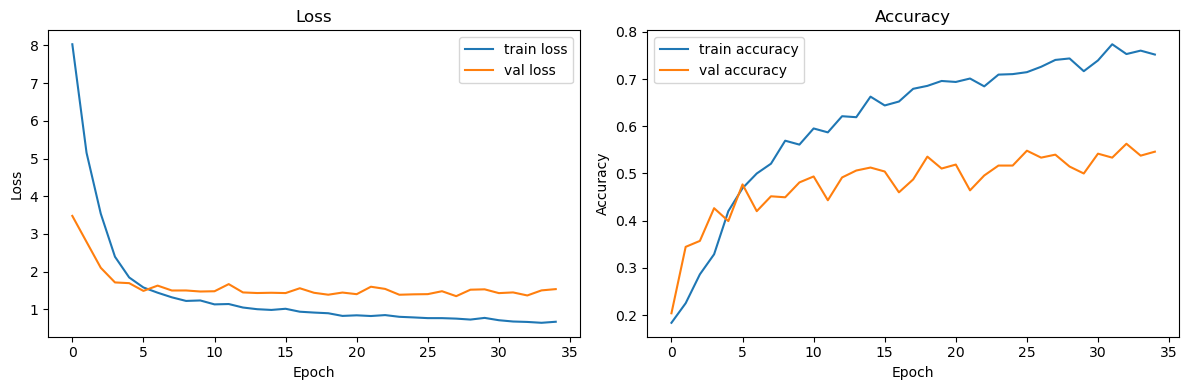

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.25      0.27        28
           1       0.55      0.86      0.67        72
           2       0.46      0.40      0.43        58
           3       0.40      0.38      0.39        60
           4       0.63      0.70      0.66        60
           5       0.59      0.47      0.53        55
           6       0.62      0.42      0.50        74
           7       0.61      0.62      0.61        69

    accuracy                           0.54       476
   macro avg       0.52      0.51      0.51       476
weighted avg       0.54      0.54      0.53       476


Confusion Matrix:
[[ 7 12  0  8  0  0  0  1]
 [ 0 62  0  0  0  3  3  4]
 [ 1  4 23  5  5  9  2  9]
 [ 4 18  5 23  5  2  3  0]
 [ 2  5  2  0 42  0  7  2]
 [ 0  4  7 10  4 26  3  1]
 [ 4  8  2 10  7  1 31 11]
 [ 5  0 11  2  4  3  1 43]]

Accuracy globale sur le test : 0.5399



In [44]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv1D, Flatten, Dropout, Activation, MaxPooling1D, BatchNormalization
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras.callbacks import EarlyStopping

class TrainModel:

    @staticmethod
    def train_neural_network(X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        x_traincnn = np.expand_dims(X_train, axis=2)
        x_testcnn = np.expand_dims(X_test, axis=2)

        print("Train shape:", x_traincnn.shape)
        print("Test shape:", x_testcnn.shape)

        model = Sequential()
        model.add(Conv1D(128, 5, padding='same', input_shape=(40, 1)))
        model.add(Activation('relu'))
        model.add(Dropout(0.3))
        model.add(Flatten())
        model.add(Dense(8, activation='softmax'))


        print(model.summary())

        model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

        history = model.fit(x_traincnn, y_train,
                            batch_size=16,
                            epochs=50,
                            validation_data=(x_testcnn, y_test),
                            callbacks=[early_stopping],
                            verbose=2)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='train accuracy')
        plt.plot(history.history['val_accuracy'], label='val accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

        predictions = np.argmax(model.predict(x_testcnn), axis=1)

        print("\nClassification Report:")
        print(classification_report(y_test, predictions))

        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, predictions))

        acc = np.mean(predictions == y_test)
        print(f"\nAccuracy globale sur le test : {acc:.4f}\n")

if __name__ == '__main__':
    print('Training started')
    X = joblib.load("saved_data/X.joblib")
    y = joblib.load("saved_data/y.joblib")
    TrainModel.train_neural_network(X, y)


## Mélange github et code perso

In [8]:
import os
import librosa
import numpy as np
import joblib

def extract_and_save_features_joblib(directory, max_len=100, save_dir="saved_data"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    X, y = [], []
    for actor_dir in os.listdir(directory):
        path = os.path.join(directory, actor_dir)
        if os.path.isdir(path):
            print(f"Traitement du dossier {actor_dir}")
            files = [f for f in os.listdir(path) if f.endswith(".wav")]
            for file in files:
                label = int(file.split("-")[2])  # l'émotion en int pour sparse_categorical_crossentropy
                filepath = os.path.join(path, file)
                signal, sr = librosa.load(filepath, sr=None)
                mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
                if mfcc.shape[1] < max_len:
                    pad_width = max_len - mfcc.shape[1]
                    mfcc = np.pad(mfcc, pad_width=((0,0),(0,pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :max_len]
                X.append(mfcc.T)
                y.append(label)

    X = np.array(X)
    y = np.array(y)

    joblib.dump(X, os.path.join(save_dir, "Xperso.joblib"))
    joblib.dump(y, os.path.join(save_dir, "yperso.joblib"))
    print(f"Features et labels sauvegardés dans {save_dir}")

# Usage
base_dir = "ndataset/audio_speech_actors_01-24"
extract_and_save_features_joblib(base_dir)


Traitement du dossier Actor_01
Traitement du dossier Actor_02
Traitement du dossier Actor_03
Traitement du dossier Actor_04
Traitement du dossier Actor_05
Traitement du dossier Actor_06
Traitement du dossier Actor_07
Traitement du dossier Actor_08
Traitement du dossier Actor_09
Traitement du dossier Actor_10
Traitement du dossier Actor_11
Traitement du dossier Actor_12
Traitement du dossier Actor_13
Traitement du dossier Actor_14
Traitement du dossier Actor_15
Traitement du dossier Actor_16
Traitement du dossier Actor_17
Traitement du dossier Actor_18
Traitement du dossier Actor_19
Traitement du dossier Actor_20
Traitement du dossier Actor_21
Traitement du dossier Actor_22
Traitement du dossier Actor_23
Traitement du dossier Actor_24
Features et labels sauvegardés dans saved_data


In [28]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv1D, Flatten, Dropout, Activation
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Chemins
SAVE_DIR_PATH = "saved_data"
MODEL_DIR_PATH = "saved_model"

# Charger données
X = joblib.load(os.path.join(SAVE_DIR_PATH, 'Xperso.joblib'))  # (n_samples, 100, 40)
y = joblib.load(os.path.join(SAVE_DIR_PATH, 'yperso.joblib'))

# Décalage des labels de 1..8 à 0..7 pour Keras
y = y - 1

# Vérifie la forme et labels uniques
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("Labels uniques après décalage:", np.unique(y))

# Diviser train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Modèle
model = Sequential()
model.add(Conv1D(64, 5, padding='same', input_shape=(X_train.shape[1], X_train.shape[2])))  # (100, 40)
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8))  # 8 classes d’émotions
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

# Pas de sauvegarde du modèle ici

# Graphiques
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Évaluation finale
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy globale sur le test : {accuracy:.4f}")


Shape de X: (1440, 40)
Shape de y: (1440,)
Labels uniques après décalage: [-1  0  1  2  3  4  5  6]
Train shape: (964, 40)
Test shape: (476, 40)


IndexError: tuple index out of range

Shape de X: (1440, 100, 40)
Shape de y: (1440,)
Labels uniques après décalage: [0 1 2 3 4 5 6 7]
Train shape: (964, 100, 40)
Test shape: (476, 100, 40)
Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1139 - loss: 78.0322 - val_accuracy: 0.2059 - val_loss: 8.7269
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1955 - loss: 5.8119 - val_accuracy: 0.2332 - val_loss: 2.2478
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2673 - loss: 2.3278 - val_accuracy: 0.2017 - val_loss: 2.0044
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3056 - loss: 1.8587 - val_accuracy: 0.2479 - val_loss: 2.0901
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4133 - loss: 1.6359 - val_accuracy: 0.2773 - val_loss: 1.9444
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4006 - loss: 1.6180 - val_accuracy: 0.3004 - val_loss: 2.1296
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4726 - loss: 1.4626 

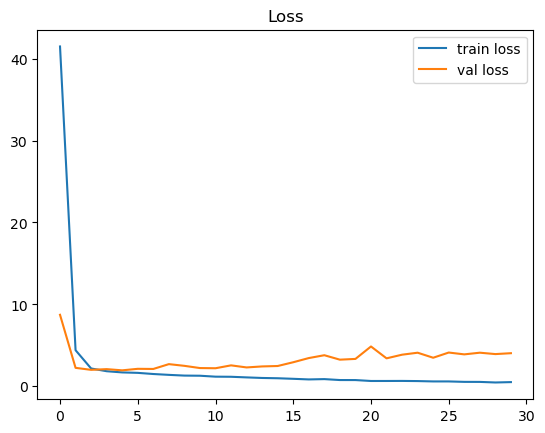

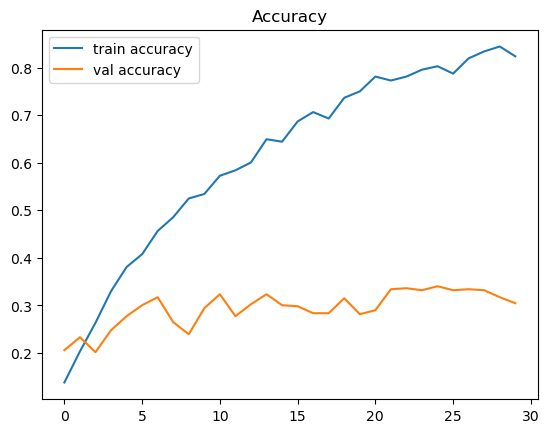

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.31      0.29      0.30        28
           1       0.26      0.17      0.20        72
           2       0.26      0.22      0.24        58
           3       0.27      0.18      0.22        60
           4       0.33      0.65      0.43        60
           5       0.32      0.31      0.31        55
           6       0.39      0.38      0.38        74
           7       0.25      0.25      0.25        69

    accuracy                           0.30       476
   macro avg       0.30      0.31      0.29       476
weighted avg       0.30      0.30      0.29       476

[[ 8 10  0  1  1  2  4  2]
 [ 5 12  7 14 11  6  8  9]
 [ 2  4 13  2 20  5  5  7]
 [ 4 10  6 11  7  7  8  7]
 [ 1  0  3  3 39  4  5  5]
 [ 0  5  5  3 14 17  5  6]
 [ 2  2 11  1 10  5 28 15]
 [ 4  3  5  6 18  7  9 17]]


In [30]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv1D, Flatten, Dropout, Activation, MaxPooling1D, Input
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Chemins
SAVE_DIR_PATH = "saved_data"
MODEL_DIR_PATH = "saved_model"

# Charger données
X = joblib.load(os.path.join(SAVE_DIR_PATH, 'Xperso.joblib'))  # (n_samples, 100, 40)
y = joblib.load(os.path.join(SAVE_DIR_PATH, 'yperso.joblib'))

# Décalage des labels de 1..8 à 0..7 pour Keras
y = y - 1

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("Labels uniques après décalage:", np.unique(y))

# Diviser train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Modèle avec couche Input() pour éviter le warning
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(64, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Entraînement
history = model.fit(X_train, y_train, batch_size=16, epochs=30, validation_data=(X_test, y_test))

# Évaluation finale (accuracy globale sur test)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy globale sur le test: {test_acc:.4f}")

# Graphiques
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Classification report + matrice de confusion
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))


## POUBELLE

In [7]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def extract_features(directory, max_len=100):
    X, y = [], []
    total_files = 0
    for actor_dir in os.listdir(directory):
        path = os.path.join(directory, actor_dir)
        if os.path.isdir(path):
            files = [f for f in os.listdir(path) if f.endswith(".wav")]
            print(f"Traitement du dossier {actor_dir} avec {len(files)} fichiers")
            for i, file in enumerate(files, 1):
                label = file.split("-")[2]  # Extrait l'émotion
                filepath = os.path.join(path, file)
                signal, sr = librosa.load(filepath, sr=None)
                mfcc = librosa.feature.mfcc(signal, sr=sr, n_mfcc=40)
                if mfcc.shape[1] < max_len:
                    pad_width = max_len - mfcc.shape[1]
                    mfcc = np.pad(mfcc, pad_width=((0,0),(0,pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:,:max_len]
                X.append(mfcc.T)
                y.append(label)
    return np.array(X), np.array(y)


# Chargement données
base_dir = "ndataset/audio_speech_actors_01-24"
X, y = extract_features(base_dir)

# Encodage labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Définition modèle LSTM (inspiré repo)
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Traitement du dossier Actor_01 avec 60 fichiers


C:\Users\boucceredj\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


TypeError: mfcc() takes 0 positional arguments but 1 positional argument (and 2 keyword-only arguments) were given